In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [45]:
FRED_DATA = pd.read_csv('btc_bond_sp500_data.csv')

FRED_DATA['Date'] = pd.to_datetime(FRED_DATA['Date'])

# Set 'Date' as the index
FRED_DATA.set_index('Date', inplace=True)

print(FRED_DATA.head())

            Bond Price  Bitcoin Price  S&P 500
Date                                          
2018-01-01         NaN       13480.01      NaN
2018-01-02        2.46       14781.51  2695.81
2018-01-03        2.44       15098.14  2713.06
2018-01-04        2.46       15144.99  2723.99
2018-01-05        2.47       16960.01  2743.15


In [46]:
FRED_DATA['Bitcoin Price'].interpolate(method= 'linear', inplace = True)
FRED_DATA['Bond Price'].ffill(inplace=True)
FRED_DATA['S&P 500'].interpolate(method= 'linear', inplace = True)

print(FRED_DATA.isna().sum())
FRED_DATA = FRED_DATA.dropna()
FRED_DATA.head()


Bond Price       1
Bitcoin Price    0
S&P 500          1
dtype: int64


,Bond Price,Bitcoin Price,S&P 500
Date,,,
2018-01-02,2.46,14781.51,2695.81
2018-01-03,2.44,15098.14,2713.06
2018-01-04,2.46,15144.99,2723.99
2018-01-05,2.47,16960.01,2743.15
2018-01-06,2.47,17098.99,2744.67


<function matplotlib.pyplot.show(close=None, block=None)>

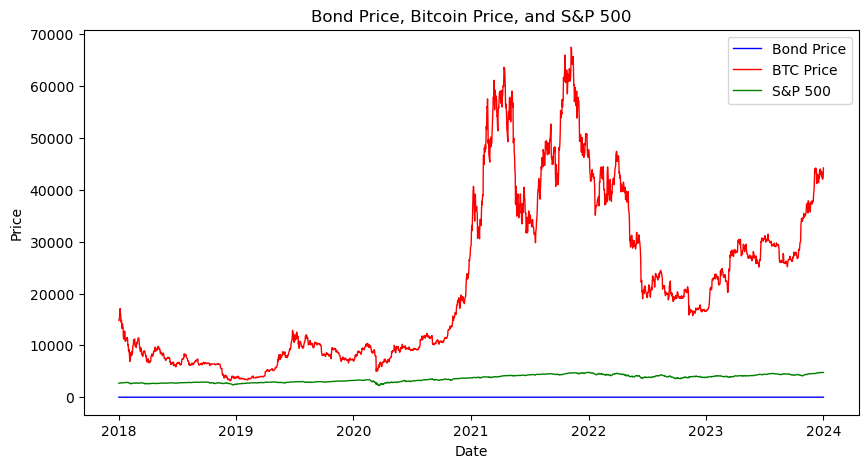

In [47]:
plt.figure(figsize=(10,5))
plt.plot(FRED_DATA.index, FRED_DATA['Bond Price'], color= 'b', label='Bond Price', linewidth=1)
plt.plot(FRED_DATA.index, FRED_DATA['Bitcoin Price'], color= 'r', label='BTC Price', linewidth=1)
plt.plot(FRED_DATA.index, FRED_DATA['S&P 500'], color= 'g' ,label='S&P 500', linewidth=1)
plt.title('Bond Price, Bitcoin Price, and S&P 500')
plt.xlabel('Date')  
plt.ylabel('Price')
plt.legend()

plt.show


In [48]:


FRED_DATA['Bond Return'] = np.log(FRED_DATA['Bond Price']/FRED_DATA['Bond Price'].shift(1))
FRED_DATA['Bitcoin Return'] = np.log(FRED_DATA['Bitcoin Price']/FRED_DATA['Bitcoin Price'].shift(1))
FRED_DATA['S&P 500 Return'] = np.log(FRED_DATA['S&P 500']/FRED_DATA['S&P 500'].shift(1))


FRED_DATA = FRED_DATA.dropna()

FRED_DATA.head()


,Bond Price,Bitcoin Price,S&P 500,Bond Return,Bitcoin Return,S&P 500 Return
Date,,,,,,
2018-01-03,2.44,15098.14,2713.06,-0.008163,0.021194,0.006378
2018-01-04,2.46,15144.99,2723.99,0.008163,0.003098,0.004021
2018-01-05,2.47,16960.01,2743.15,0.004057,0.113188,0.007009
2018-01-06,2.47,17098.99,2744.67,0.000000,0.008161,0.000554
2018-01-07,2.47,16174.22,2746.19,0.000000,-0.055601,0.000554


In [49]:
correlation_matrix = FRED_DATA[['Bond Return', 'Bitcoin Return', 'S&P 500 Return']].corr()

# Display the correlation matrix
correlation_matrix

,Bond Return,Bitcoin Return,S&P 500 Return
Bond Return,1.000000,-0.000278,0.242216
Bitcoin Return,-0.000278,1.000000,0.259746
S&P 500 Return,0.242216,0.259746,1.000000


In [53]:
y = FRED_DATA['Bitcoin Return'] - FRED_DATA['Bond Return']
X = FRED_DATA['S&P 500 Return'] - FRED_DATA['Bond Return']


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     1563.
Date:                Wed, 11 Sep 2024   Prob (F-statistic):          1.95e-258
Time:                        20:50:28   Log-Likelihood:                 4164.1
No. Observations:                2190   AIC:                            -8324.
Df Residuals:                    2188   BIC:                            -8313.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.305      0.7

a = 0.0002
b = 1.0860